In [20]:
import pandas as pd
import seaborn as sns

In [21]:
# supplier segmentation
supplier= pd.read_csv('supplier_data.csv')
supplier.head()

,supplier,product,availability,no_suppliers,standard,price_fluctuation,Quantity,price
0,supplier1,product_1,0.0,0.5,0.0,0.5,710,360
1,supplier1,product_2,0.0,0.5,0.0,0.5,2997,2740
2,supplier1,product_3,0.0,0.5,0.0,0.5,3917,2919
3,supplier1,product_4,0.0,0.5,0.0,0.5,3827,3246
4,supplier1,product_5,0.0,0.5,0.0,0.0,3882,3596


In [22]:
supplier.columns

Index(['supplier', 'product', 'availability', 'no_suppliers', 'standard',
       'price_fluctuation', 'Quantity', 'price'],
      dtype='object')

In [23]:
supplier['risk_index']= supplier['availability']+supplier['no_suppliers']+supplier['standard']+supplier['price_fluctuation']
supplier['profit_value']= supplier['price']*supplier ['Quantity']


In [24]:
supplier.profit_value.describe()

count    2.400000e+01
mean     5.064812e+06
std      4.847504e+06
min      1.189500e+05
25%      7.975622e+05
50%      3.011452e+06
75%      8.499426e+06
max      1.399081e+07
Name: profit_value, dtype: float64

In [26]:
def category(y,x):
    if((x>= 3000000)& (y >= 1)):
        return 'strategic'
    if((x>= 3000000)& (y < 1)):
        return 'leverage'
    if((x < 3000000)& (y >= 1)):
        return 'Critical'
    if((x < 3000000)& (y < 1)):
        return 'Routine'

In [27]:
for i in range(supplier.shape[0]):
    supplier.loc[i,'category']=category(supplier.loc[i,'risk_index'],
                                        supplier.loc[i,'profit_value'])

In [28]:
supplier.category.value_counts()

Critical     10
strategic     8
leverage      4
Routine       2
Name: category, dtype: int64

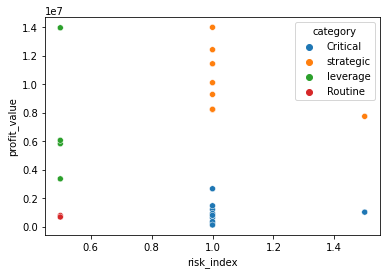

In [30]:
sns.scatterplot(x='risk_index',y='profit_value',data=supplier, hue='category')